In [1]:
import os
#os.chdir('..')
print("Current Working Directory " , os.getcwd())
import sys
sys.path.append("../") # Add directory containing src/data to path
import numpy as np
from utils import *

Current Working Directory  /nfs/homedirs/zhz/uncertainty-quantification/dataset_analyze


In [2]:
path = '/lab/project-1/mapilary_data'
os.listdir(path)
anno_path = '/lab/project-1/annotation/mtsd_v2_fully_annotated/annotations'
split_path = '/lab/project-1/annotation/mtsd_v2_fully_annotated/splits'


In [3]:
# get image key of 3 datasets
f = open(split_path+'/train.txt', 'r')
train_images = f.read().splitlines()
f.close()

f = open(split_path+'/val.txt', 'r')
val_images = f.read().splitlines()
f.close()

f = open(split_path+'/test.txt', 'r')
test_images = f.read().splitlines()
f.close()

In [4]:
# annos is a large list of tuple, first component is key of image, seconde is annotations 
train_keys, train_annos = split_annos(train_images, anno_path)
val_kays, val_annos = split_annos(val_images, anno_path)
test_keys, test_annos = split_annos(test_images, anno_path) # Note, annotations dont have information of test set!!!

In [7]:
train_set= list(zip(train_keys, train_annos))

In [8]:
train_set[0]

('92CaCXDyZJrZUiTNiv4nnw',
 {'width': 3984,
  'height': 2988,
  'ispano': False,
  'objects': [{'key': 'vATz7jDNTxu0McNMGIKyxg',
    'label': 'other-sign',
    'bbox': {'xmin': 1959.90234375,
     'ymin': 1542.146484375,
     'xmax': 1983.24609375,
     'ymax': 1574.244140625},
    'properties': {'barrier': False,
     'occluded': False,
     'out-of-frame': False,
     'exterior': False,
     'ambiguous': True,
     'included': False,
     'direction-or-information': False,
     'highway': False,
     'dummy': False}},
   {'key': 'V6W2wE78S82fImHZuKyBAg',
    'label': 'other-sign',
    'bbox': {'xmin': 1961.84765625,
     'ymin': 1547.2529296875,
     'xmax': 1978.3828125,
     'ymax': 1561.11328125},
    'properties': {'barrier': False,
     'occluded': False,
     'out-of-frame': False,
     'exterior': False,
     'ambiguous': True,
     'included': True,
     'direction-or-information': False,
     'highway': False,
     'dummy': False}}]})

In [10]:
train_annos[0]
# not (True in (train_annos[1]['objects'][0]['properties']).values())


{'width': 3984,
 'height': 2988,
 'ispano': False,
 'objects': [{'key': 'vATz7jDNTxu0McNMGIKyxg',
   'label': 'other-sign',
   'bbox': {'xmin': 1959.90234375,
    'ymin': 1542.146484375,
    'xmax': 1983.24609375,
    'ymax': 1574.244140625},
   'properties': {'barrier': False,
    'occluded': False,
    'out-of-frame': False,
    'exterior': False,
    'ambiguous': True,
    'included': False,
    'direction-or-information': False,
    'highway': False,
    'dummy': False}},
  {'key': 'V6W2wE78S82fImHZuKyBAg',
   'label': 'other-sign',
   'bbox': {'xmin': 1961.84765625,
    'ymin': 1547.2529296875,
    'xmax': 1978.3828125,
    'ymax': 1561.11328125},
   'properties': {'barrier': False,
    'occluded': False,
    'out-of-frame': False,
    'exterior': False,
    'ambiguous': True,
    'included': True,
    'direction-or-information': False,
    'highway': False,
    'dummy': False}}]}

In [11]:
def split_g(label:str):
    '''
    Note: this is only for signs infor, warn, comple, regu
    to split signs with same g value
    we have g1-12, g15, g25, g45 in total 15
    
    '''
    num = 99
    if label[-2] == 'g':
        num = int(label[-1])-1
    elif (label[-2:]<='12'):
        num = int(label[-2:])-1
    elif (label[-2:]>'12'):
        if label[-2:]=='15':
            num = 12
        elif label[-2:] == '25':
            num = 13
        elif label[-2:] == '45':
            num = 14
        else:
            print('error', label)
    else:
        print('error', label)
    return num

In [23]:
def prop_in_cat(prop:str, annos):
    """
    to summarize properties within distribution
    """
    count = [0 for i in range(5)]
    for i in range(len(annos)):
        for j in range(len(train_annos[i]['objects'])):
            if train_annos[i]['objects'][j]['properties'][prop]==True:
                # print(train_annos[i]['objects'][j]['label'])
                label = train_annos[i]['objects'][j]['label']
                if label[:4] == 'othe':
                    num = 0
                elif label[:4] == 'info':
                    num = 1
                elif label[:4] == 'warn':
                    num = 2
                elif label[:4] == 'comp':
                    num = 3
                elif label[:4] == 'regu':
                    num = 4
                else:
                    print('error',label)
                    break
                count[num]+=1
    return count

In [26]:
# properties: barrier, occluded, out-of-frame, exterior, 
# ambiguous, included, direction-or-information, highway, dummy
barrier = prop_in_cat('barrier', train_annos)
occluded = prop_in_cat('occluded', train_annos)
out_of_frame = prop_in_cat('out-of-frame', train_annos)
exterior = prop_in_cat('exterior', train_annos)
ambiguous = prop_in_cat('ambiguous', train_annos)
included = prop_in_cat('included', train_annos)
direction = prop_in_cat('direction-or-information', train_annos)
highway = prop_in_cat('highway', train_annos)
dummy = prop_in_cat('dummy', train_annos)

In [28]:
print(barrier)
print(occluded)
print(out_of_frame)
print(exterior)
print(ambiguous)
print(included)
print(direction)
print(highway)
print(dummy)


[1249, 0, 0, 0, 0]
[12838, 359, 978, 407, 1888]
[1769, 43, 187, 81, 230]
[4596, 0, 0, 0, 0]
[60005, 0, 0, 0, 0]
[5894, 1189, 508, 91, 2499]
[23009, 0, 0, 0, 0]
[2413, 0, 0, 0, 0]
[4233, 557, 178, 57, 925]


In [29]:
print(sum(barrier))
print(sum(occluded))
print(sum(out_of_frame))
print(sum(exterior))
print(sum(ambiguous))
print(sum(included))
print(sum(direction))
print(sum(highway))
print(sum(dummy))

1249
16470
2310
4596
60005
10181
23009
2413
5950


In [53]:
def prop_in_dist(prop:str, annos):
    """
    to summarize properties within distribution
    """
    count = [0 for i in range(15)]
    num=99
    for i in range(len(annos)):
        for j in range(len(train_annos[i]['objects'])):
            if train_annos[i]['objects'][j]['properties'][prop]==True:
                label = train_annos[i]['objects'][j]['label']
                if label[:4] != 'othe':
                    # print(label)
                    num = split_g(label)
                    count[num]+=1
    return count

In [57]:
g_bar = prop_in_dist('barrier', train_annos)
g_occ = prop_in_dist('occluded', train_annos)
g_out = prop_in_dist('out-of-frame', train_annos)
g_ext = prop_in_dist('exterior', train_annos)
g_amb = prop_in_dist('ambiguous', train_annos)
g_inc = prop_in_dist('included', train_annos)
g_dir = prop_in_dist('direction-or-information', train_annos)
g_high = prop_in_dist('highway', train_annos)
g_dum = prop_in_dist('dummy', train_annos)
print('g_bar',g_bar)
print('g_occ',g_occ)
print('g_out',g_out)
print('g_ext',g_ext)
print('g_amb',g_amb)
print('g_inc',g_inc)
print('g_dir',g_dir)
print('g_high',g_high)
print('g_dum',g_dum)

g_bar [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g_occ [2274, 539, 318, 222, 94, 26, 3, 2, 13, 4, 2, 2, 119, 12, 2]
g_out [329, 97, 47, 28, 10, 4, 0, 3, 0, 1, 1, 0, 20, 1, 0]
g_ext [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g_amb [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g_inc [2543, 954, 285, 180, 211, 42, 5, 4, 4, 0, 0, 2, 51, 4, 2]
g_dir [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g_high [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g_dum [1234, 264, 82, 17, 61, 30, 3, 6, 0, 0, 0, 1, 16, 3, 0]


In [33]:
def add(list, num):
    sum = 0
    for i in range(len(list)):
        sum += list[i][num]
    return sum

In [35]:
list = [barrier, occluded, out_of_frame, exterior, \
    ambiguous, included, direction, highway, dummy]

2148

In [40]:
print(add(list,0),add(list,1),add(list,2),add(list,3),add(list,4))

116006 2148 1851 636 5542


In [59]:
list2 = [g_bar, g_occ, g_out, g_ext,\
    g_amb, g_inc, g_dir, g_high,g_dum]
print(add(list2,0),add(list2,1),add(list2,2),\
    add(list2,3),add(list2,4),add(list2,5),\
        add(list2,6),add(list2,7),add(list2,8),\
            add(list2,9),add(list2,10),add(list2,11),\
                add(list2,12),add(list2,13),add(list2,14))

6380 1854 732 447 376 102 11 15 17 5 3 5 206 20 4


In [62]:
# plot example of the property
def find_prop(prop:str, train_annos):
    """return a list of index, which have this property"""
    index = []
    for i in range(len(train_annos)):
        for j in range(len(train_annos[i]['objects'])):
            if train_annos[i]['objects'][j]['properties'][prop]==True:
                index.append((i,j))
    return index

In [64]:
bar_index = find_prop('barrier', train_annos)


In [106]:
from PIL import Image
import matplotlib.pyplot as plt
def show_sign(index, train_keys, train_annos):
    '''this is for getting the sign window with given index'''
    i = index[0]
    j = index[1]
    image_key = train_keys[i]
    img_path = '/lab/project-1/train_img/images/'
    img = np.array(Image.open(img_path + str(image_key) + '.jpg'))

    xmin = int(np.floor(train_annos[i]['objects'][j]['bbox']['xmin']))
    ymin = int(np.floor(train_annos[i]['objects'][j]['bbox']['ymin']))
    xmax = int(np.ceil(train_annos[i]['objects'][j]['bbox']['xmax']))
    ymax = int(np.ceil(train_annos[i]['objects'][j]['bbox']['ymax']))

    sign_np = img[ymin:ymax+1, xmin:xmax+1, :]
    return sign_np
    
def show_img(f1,f2,s1,s2):
    plt.figure()
    plt.subplot(221)
    plt.imshow(f1)
    plt.subplot(222)
    plt.imshow(s1)
    plt.subplot(223)
    plt.imshow(f2)
    plt.subplot(224)
    plt.imshow(s2)


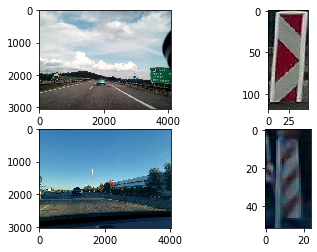

In [107]:
img_path = '/lab/project-1/train_img/images/'
f_img1 = Image.open(img_path + train_keys[bar_index[99][0]] + '.jpg')
bar_img1 = show_sign(bar_index[99], train_keys, train_annos)

f_img2 = Image.open(img_path + train_keys[bar_index[79][0]] + '.jpg')
bar_img2 = show_sign(bar_index[79], train_keys, train_annos)

show_img(f_img1, f_img2 ,bar_img1, bar_img2)


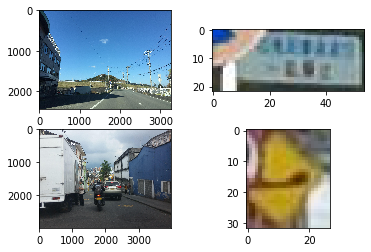

In [95]:
occ_index = find_prop('occluded', train_annos)
f_occ_img1 = Image.open(img_path + train_keys[occ_index[99][0]] + '.jpg')
occ_img1 = show_sign(occ_index[99], train_keys, train_annos)

f_occ_img2 = Image.open(img_path + train_keys[occ_index[79][0]] + '.jpg')
occ_img2 = show_sign(occ_index[79], train_keys, train_annos)

show_img(f_occ_img1, f_occ_img2,occ_img1, occ_img2)

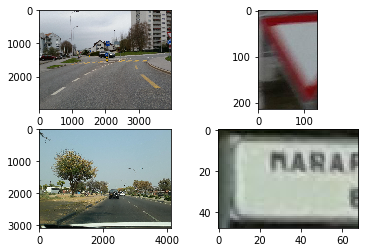

In [108]:
out_index = find_prop('out-of-frame', train_annos)
f_out_img1 = Image.open(img_path + train_keys[out_index[99][0]] + '.jpg')
out_img1 = show_sign(out_index[99], train_keys, train_annos)

f_out_img2 = Image.open(img_path + train_keys[out_index[79][0]] + '.jpg')
out_img2 = show_sign(out_index[79], train_keys, train_annos)

show_img(f_out_img1, f_out_img2, out_img1, out_img2)

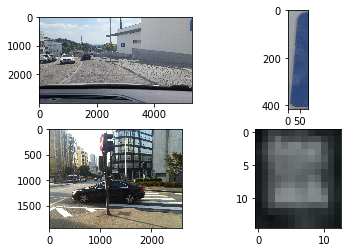

In [124]:
index = find_prop('ambiguous', train_annos)
full_img1 = Image.open(img_path + train_keys[index[99][0]] + '.jpg')
sign_img1 = show_sign(index[99], train_keys, train_annos)

full_img2 = Image.open(img_path + train_keys[index[85][0]] + '.jpg')
sign_img2 = show_sign(index[85], train_keys, train_annos)

show_img(full_img1, full_img2, sign_img1, sign_img2)